# Statistics I & II

### Part 1. _Analyzing Stop and Frisk Data_

An analysis by the NYCLU revealed that innocent New Yorkers have been subjected to police stops and street interrogations more than 5 million times since 2002, and that black and Latino communities continue to be the overwhelming target of these tactics. Nearly nine out of 10 stopped-and-frisked New Yorkers have been completely innocent. <br>

The defenders of Stop & Frisk have said that the stops have been random and as such they've been able to reduce the crime rates in the city. However, you feel that you the arrests have been leveled in an unfair manner and more so against black people in the city. <br>

As such you set out to investigate this and look at the stop and frisk data from 2003 - 2017. The data is provided as excel files in the NYPD website below:

<img src = 'stop_frisk.png'>

You realize that some of the files are not like the others but you have enough information from the files to make your analysis work. You are certainely interested in establishing whether,  for the arrests that didn't lead to an arrest (where no offense was found), was the choice to stop the subject random or not. In this analysis, you will  have to consider the population of NYC as found in the census website below.

<img src = 'population.png'>

### Your task

Your task is to come up with the statistic and the model needed to find out whether the stop and frisk program could actually be biased in its treatment of NYC's black population. Could it be biased? Or it is as random as the NYPD claims?

### Please note

Please take the time to study the files. The codebook to the files is provided. 
<br>
Making the time upfront to understand the data and the task you are supposed to do is useful. It iwll make the task of putting together the files to come up with the conviction rates plus coming up with the statistic and the simulations very straightforward. <br>
The goal of the question is to get you using all the skills you have learned in class to do the kind of work you'd be doing outside of a class environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#stop and frisk data downloaded from 'https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page'
#data contained in 14 csv files and 1 xlsx file

#name folder containing stop and frisk data files
import glob
from pathlib import Path
sf_data = Path("C:/Users/Mifta/Documents/NYU Wagner/Python/StatisticsHW/stopfrisk/NYPD Stop Frisk Data 2003_2017")

#check encoding for all files in sf_data, to address encoding concerns in assignment instructions
#COMMENTED CODE# for currentfile in sf_data.iterdir(): 
    #COMMENTED CODE# with open(currentfile) as data: print(data)
#encoding for all files in sf_data is 'cp1252'

#csv files 2003-2016: create a dataframe by using a for loop to read in columns of interest from csv files
sf_df=pd.DataFrame()
for f in sf_data.glob('*.csv'):
    df1 = pd.concat([pd.read_csv(f, usecols=['year', 'arstmade', 'race'], dtype='unicode', encoding='cp1252')])
    sf_df = sf_df.append(df1, ignore_index=True)

#xlsx file 2017: create a dataframe by reading in columns of interest from xlsx file
df17 = pd.read_excel(sf_data/'sqf-2017.xlsx', names=('year', 'arstmade', 'race'), usecols="D, W, BN", dtype='unicode', encoding='cp1252')

#recode 2017 race values to match 2003-2016 race values
def race_recode(race):
    if race=='ASIAN/PAC.ISL': new_race='A'
    elif race=='BLACK': new_race='B'
    elif race=='AMER IND': new_race ='I'
    elif race=='BLACK HISPANIC': new_race='P'
    elif race=='WHITE HISPANIC': new_race='Q'
    elif race=='WHITE': new_race='W'
    elif race=='(null)': new_race='X'
    elif race=='MALE': new_race='X' #data entry error led to instances of 'MALE' for race
    else: new_race ='Z'
    return new_race
df17['race']=df17['race'].apply(race_recode)

#concatenate csv df (03-16) and xlsx df(17) to create one dataframe
sf_df=pd.concat([sf_df, df17], ignore_index=True)

In [3]:
#recode black hispanic to black for purposes of this analysis
sf_df['race']=sf_df['race'].where(sf_df['race']!='P', 'B')

#replace empty cells with NA and check how many NAs there are in the dataframe
sf_df.replace(' ', np.nan, inplace=True)
#COMMENTED CODE# print(sf_df.isna().sum())
#NAs - year: 1; arstmade: 2; race: 165

#fill race NAs with X to represent "unknown" per codebook and drop remaining NAs
sf_df['race']=sf_df['race'].fillna('X')
sf_df.dropna(inplace=True)

#descriptives
#check number of rows in dataframe
print('There were', '{:,}'.format(len(sf_df)), 'stops between 2003 and 2017, inclusive.')

There were 5,076,775 stops between 2003 and 2017, inclusive.


In [4]:
df_black = sf_df[sf_df['race']=='B']

#some observations out of curiosity below (can ignore for purposes of this task):
#print(np.count_nonzero(np.where(df_black['arstmade']=='N'))) #2,762,927 stops of black people that did not lead to arrest
#print(np.count_nonzero(df_black['arstmade'])) #2,942,275 stops of black people total
#print(np.count_nonzero(np.where(sf_df['arstmade']=='N'))) #4,766,473 stops did not lead to arrest
#print(np.count_nonzero(sf_df['arstmade'])) #5,076,775 stops total
#check percent of stops that did not lead to arrest, for black individuals only
#print('Out of', '{:,}'.format(np.count_nonzero(df_black['arstmade'])), 'stops of black people,', '{:,}'.format(np.count_nonzero(np.where(df_black['arstmade']=='N'))), 'or around','{0:.2f}%'.format((np.count_nonzero(np.where(df_black['arstmade']=='N'))/np.count_nonzero(df_black['arstmade']))*100), 'did not result in an arrest.')

#check percent of all stops that did not lead to arrest
print('Out of', '{:,}'.format(np.count_nonzero(sf_df['arstmade'])), 'stops,', '{:,}'.format(np.count_nonzero(np.where(sf_df['arstmade']=='N'))), 'or around','{0:.2f}%'.format((np.count_nonzero(np.where(sf_df['arstmade']=='N'))/np.count_nonzero(sf_df['arstmade']))*100), 'did not result in an arrest.')

df_innocent = sf_df[sf_df['arstmade']=='N']

Out of 5,076,775 stops, 4,766,473 or around 93.89% did not result in an arrest.


In [5]:
#check percent of stops where suspect was black
print('Around','{0:.2f}%'.format((np.count_nonzero(np.where(sf_df['race']=='B'))/np.count_nonzero(sf_df['race']))*100), 'of all stops were of a black person.')

#check percent of innocent stops where suspect was black
print('Around','{0:.2f}%'.format((np.count_nonzero(np.where(df_innocent['race']=='B'))/np.count_nonzero(df_innocent['race']))*100), 'of innocent stops were of a black person.')

#from https://www1.nyc.gov/assets/planning/download/office/data-maps/nyc-population/census2010/t_sf1_dp_nyc.xlsx row 86, black population in NYC is ~25.5%
print('According to the 2010 census, as reported by the NYC Dept. of City Planning, the population of NYC is ~25.5% black.')

Around 57.96% of all stops were of a black person.
Around 57.97% of innocent stops were of a black person.
According to the 2010 census, as reported by the NYC Dept. of City Planning, the population of NYC is ~25.5% black.


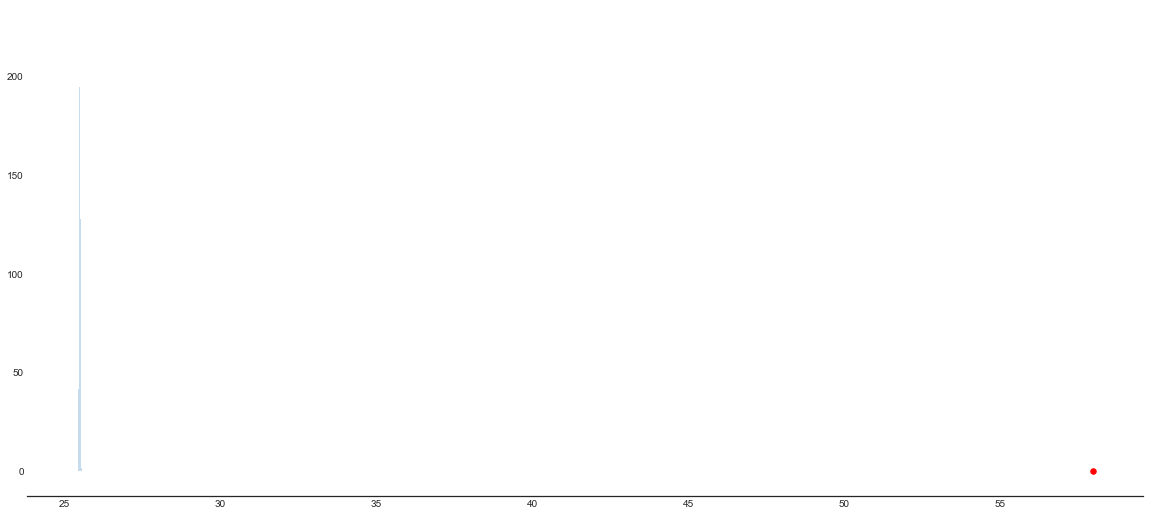

In [6]:
#QUESTION: Of stops that did not result in an arrest, is the person significantly more likely to be black than would be expected based on the demographics of NYC?

#The statistic: Proportion of the population of innocent stops who are black: a sample proportion of 0.5797 (57.97%)

#Method 1: Simulate a random distribution around the 25.5% black population in NYC using total number of stops as the sample size
#and then plot the 57.96% statistic on a histogram of the distribution

black_pop_nyc = [0.255, 0.745] #See above; according to the 2010 census, as reported by NYC DCP, NYC is 25.5% black

def sample_proportions(sample_size, probabilities):
    return np.random.multinomial(sample_size, probabilities) / sample_size

counts = []

for i in range(1000):
    counts.append(100*sample_proportions(5076775, black_pop_nyc)[0])

def setUpPlot():    
    plt.style.use('seaborn-white')
    plt.figure(figsize=(20,9))
    ax = plt.subplot(1,1,1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
setUpPlot()
plt.hist(counts, alpha = 0.25);
plt.scatter(57.97, 0, color='red', s=30);

In [7]:
print('Based on the plot, our test statistic clearly does not fall in the distribution, suggesting that the stops are not random.')

Based on the plot, our test statistic clearly does not fall in the distribution, suggesting that the stops are not random.


In [8]:
#QUESTION: Of stops that did not result in an arrest, is the person significantly more likely to be black than would be expected based on the demographics of NYC?

#The statistic: Proportion of the population of innocent stops who are black: a sample proportion of 0.5797 (57.97%)

#Method 2: Run a hypothesis test, using data from the innocent stop dataframe, and 2010 Census data from NYC DCP website

from statsmodels.stats.proportion import proportions_ztest
count = np.count_nonzero(np.where(df_innocent['race']=='B'))
nobs = np.count_nonzero(df_innocent['race'])
value = 0.255
stat, pval = proportions_ztest(count, nobs, value)
print('{0:0.3f}'.format(pval))

#Confirmed that the above works because if you change 'value' to 0.58 i.e. closer to the statistic, the p-value starts to increase

0.000


In [11]:
print('Based on the p-value of 0.000 from the test, we can reject the null hypothesis, suggesting that the stops are not random.\nThis finding is true at an alpha level of 0.05 or 0.01, and alphas much lower.')

Based on the p-value of 0.000 from the test, we can reject the null hypothesis, suggesting that the stops are not random.
This finding is true at an alpha level of 0.05 or 0.01, and alphas much lower.


### Part 2: *Earnings, gender & height*

### Background on the data
The National Longitudinal Surveys (NLS) are a set of surveys designed to gather information at multiple points in time on the labor market activities and other significant life events of several groups of men and women. For more than 4 decades, NLS data have served as an important tool for economists, sociologists, and other researchers. <br>

The NLS has 7 major cohorts that it has studied ( we are interested in the ones highlighted ): 
- **National Longitudinal Survey of Youth 1997 (NLSY97)**
- **National Longitudinal Survey of Youth 1979 (NLSY79)**
- NLSY79 Child and Young Adult
- Older Men
- Mature Women
- Young Men
- Young Women

The NLS has two major National Longitudinal Surveys of Youth (NLSY). One is from 1979 and the other is from 1997. Both collect data on employment, income, and personal characteristics from cohorts of people who were young at the time the surveys started. More specifically, 14 to 22 years old for NLSY79 and 12 to 17 years old for NLSY97. <br>

The latest datasets are from 2014 for NLSY79 and 2015 for NLSY97. Meaning that respondents would be in the 50s and their 30s, respectively.

### Your task

The current task at hand is to look at the distribution of height and decide on who is tall / short.

Then based on this, you want to see how the income distribution is according to a person being tall / short. With the pattern that you find, and that which points to a difference, you would like to test a set of hypotheses.

One ( the null) is that the income distribution is random while the alternative is that indeed, heights and income have a relationship.

Because both datasets are at their peak earning, please use both data sets (NLSY97 and NLSY79). Your analyses should be separate. Not all the data will be complete, so please clean your data accordingly and also make conclusions based on what you see.


### Where to get the gender, height, and earnings data

You can get the sex, height and earnings data from the NLS website. 

https://www.nlsinfo.org/investigator/pages/login.jsp

Use the search method to get you the right data that you want. Do this seprately for both the NYLS79 and NYLS97 data.


**As an example, to get the gender of NLSY97 from the site you would go to variable search and look for gender in Variable Search under the search tab. You would then click on add to add the data. In addition, you would then look for height (both feet and inches) in 2015 and earnings in 2014 or 2015 (or whichever you find as the latest).**

After that you can review the variables that you have chosen under the review tab

And then make sure to save your work as a CSV.

### Imortant Notice: Existence of similar work

There exists similar work on this studies on the internet. Please, if you need to, use that work more as a guide but not as the answer, as the computation and expected product from this is different from what you will see out there. Pay attention to the nuances to not be penalized for plagiarism.

The mean height for the 1979 sample is 67.1 inches.
The mean height for women in the 1979 sample is 64.3 inches.
The mean height for men in the 1979 sample is 70.1 inches.


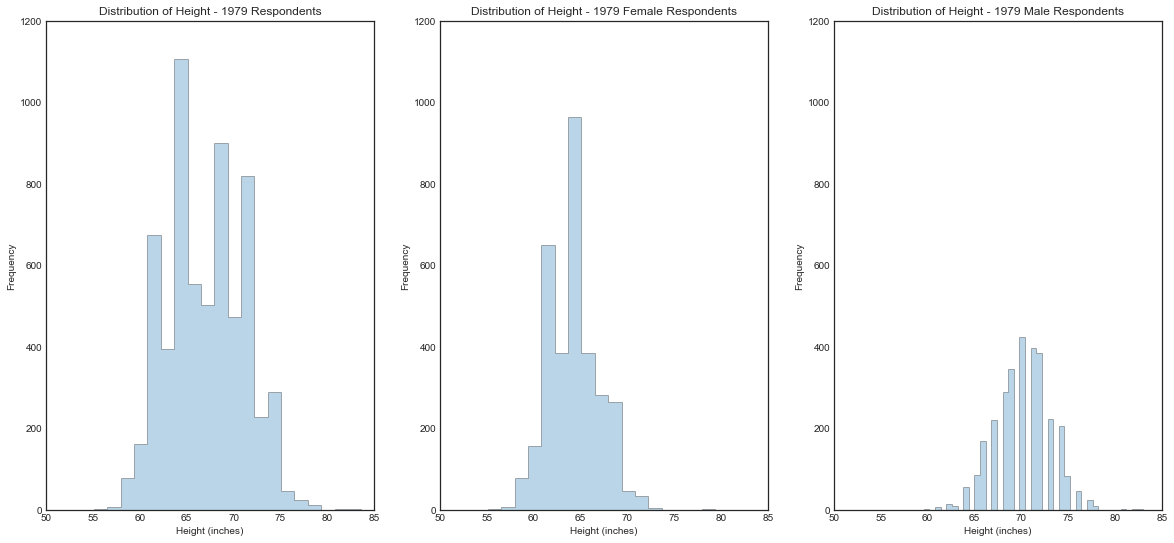

In [190]:
#1979 data
#The current task at hand is to look at the distribution of height and decide on who is tall / short.

NLSdata = Path("C:/Users/Mifta/Documents/NYU Wagner/Python/StatisticsHW/NLSdata") #name the data folder
names = ('case_ID', 'sample_ID', 'sample_race', 'sample_sex', 'height_ft', 'height_in', 'gender', 'income') #name the columns
df79 = pd.read_csv(NLSdata/'NLSdata1979.csv', names=names, index_col=0, dtype='unicode', skiprows=1) #read the data in
df79 = df79.drop(columns=['sample_ID', 'sample_race', 'sample_sex']) #drop columns that were auto-included in the download

#recode all non-responses (e.g. Non-Interviews(-5), Skips(-4,-3), Don't Knows(-2), Refusals(-1)) to NaN and genders to M,F
recode = {'-5':None, '-4':None, '-3':None, '-2':None, '-1':None}
df79=df79.replace(recode)
regender = {'1':'M', '2':'F'}
df79['gender']=df79['gender'].replace(regender)
        
#drop any row that has any missing data; rows with any missing data are not desired for this analysis
df79=df79.dropna()

#create a new height variable entirely in inches, then drop height_ft and height_in
df79['height_ft']=pd.to_numeric(df79['height_ft'])
df79['height_in']=pd.to_numeric(df79['height_in'])
df79['income']=pd.to_numeric(df79['income']) #convert income to numeric since we are converting
df79['height']=df79['height_ft']*12+df79['height_in']
df79=df79.drop(columns=['height_ft', 'height_in'])

df79_f=df79[df79['gender']=='F']
df79_m=df79[df79['gender']=='M']

#check the distribution of height
kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=40, edgecolor = 'black')

plt.figure(figsize=(20, 9));

plt.style.use('seaborn-white')

plt.subplot(1,3,1)
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.axis([50, 85, 0, 1200])
plt.hist(df79['height'], **kwargs)
plt.title('Distribution of Height - 1979 Respondents')

plt.subplot(1,3,2)
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.axis([50, 85, 0, 1200])
plt.hist(df79_f['height'], **kwargs)
plt.title('Distribution of Height - 1979 Female Respondents')

plt.subplot(1,3,3)
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.axis([50, 85, 0, 1200])
plt.hist(df79_m['height'], **kwargs)
plt.title('Distribution of Height - 1979 Male Respondents')

print('The mean height for the 1979 sample is', '{0:.1f}'.format(df79['height'].mean()), 'inches.')
print('The mean height for women in the 1979 sample is', '{0:.1f}'.format(df79_f['height'].mean()), 'inches.')
print('The mean height for men in the 1979 sample is', '{0:.1f}'.format(df79_m['height'].mean()), 'inches.')

#create a new variable for short_tall
df79['short_tall']=np.where(df79['height']>=67.1, 'tall', 'short')

df79_short=df79[df79['short_tall']=='short']
df79_tall=df79[df79['short_tall']=='tall']

The mean income for the 1979 sample is $43,659
The mean income for women in the 1979 sample is $31,492
The mean income for men in the 1979 sample is $56,831
The mean income for short people in the 1979 sample is $32,546
The mean income for tall people in the 1979 sample is $57,486


Text(0.5, 1.0, 'Distribution of Income - 1979 Tall Respondents')

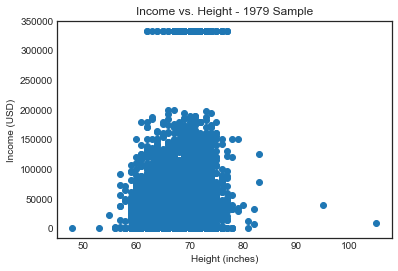

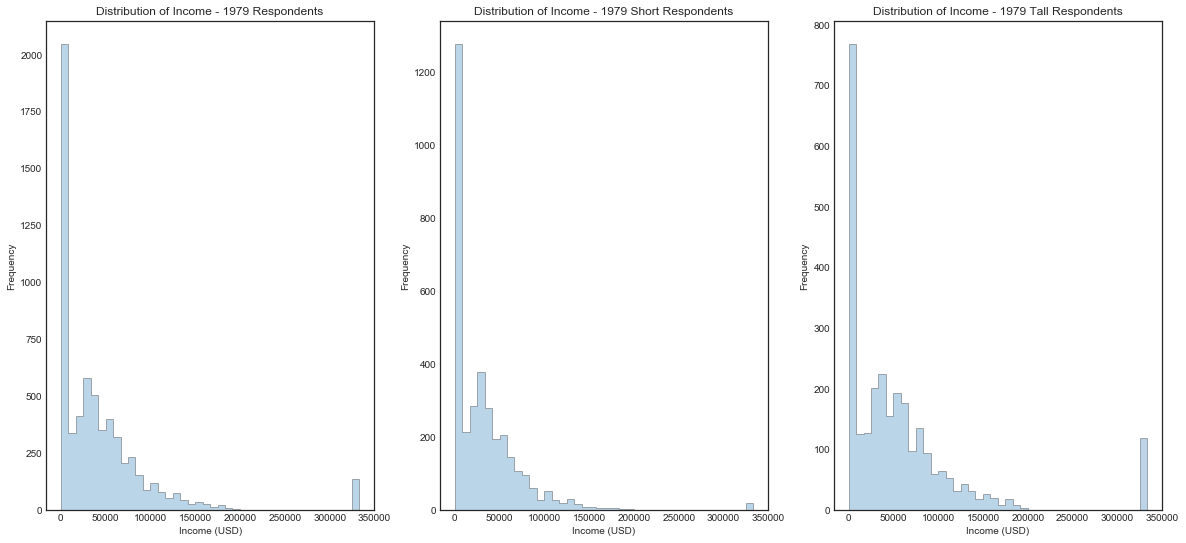

In [193]:
#Then based on this, you want to see how the income distribution is according to a person being tall / short. 
plt.scatter(df79['height'], df79['income']);
plt.title('Income vs. Height - 1979 Sample')
plt.xlabel('Height (inches)')
plt.ylabel('Income (USD)')

print('The mean income for the 1979 sample is', '${:,.0f}'.format(df79['income'].mean()))
print('The mean income for women in the 1979 sample is', '${:,.0f}'.format(df79_f['income'].mean()))
print('The mean income for men in the 1979 sample is', '${:,.0f}'.format(df79_m['income'].mean()))
print('The mean income for short people in the 1979 sample is', '${:,.0f}'.format(df79_short['income'].mean()))
print('The mean income for tall people in the 1979 sample is', '${:,.0f}'.format(df79_tall['income'].mean()))

plt.figure(figsize=(20, 9));

plt.style.use('seaborn-white')

plt.subplot(1,3,1)
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.hist(df79['income'], **kwargs)
plt.title('Distribution of Income - 1979 Respondents')

plt.subplot(1,3,2)
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.hist(df79_short['income'], **kwargs)
plt.title('Distribution of Income - 1979 Short Respondents')

plt.subplot(1,3,3)
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.hist(df79_tall['income'], **kwargs)
plt.title('Distribution of Income - 1979 Tall Respondents')

In [216]:
#With the pattern that you find, and that which points to a difference, you would like to test a set of hypotheses.
#One (the null) is that the income distribution is random while the alternative is that indeed, heights and income have a relationship.
from scipy import stats
t, p = stats.ttest_ind(df79_short['income'], df79_tall['income'])
print("t-test results: t:", t, "\n                p:", '{:,.3f}'.format(p))
print('\nThere is a significant difference in the distributions of income of short and tall people. Reject the null hypothesis.')

t-test results: t: -17.303350193509214 
                p: 0.000

There is a significant difference in the distributions of income of short and tall people. Reject the null hypothesis.


The mean height for the 1997 sample is 67.7 inches.
The mean height for women in the 1997 sample is 64.8 inches.
The mean height for men in the 1997 sample is 70.5 inches.


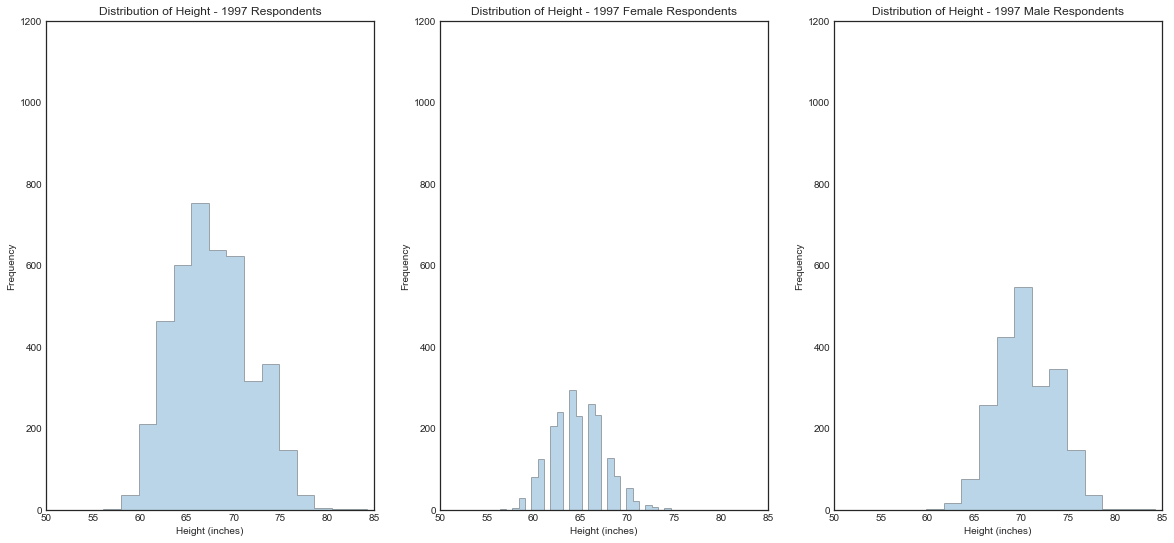

In [226]:
#1997 data
#The current task at hand is to look at the distribution of height and decide on who is tall / short.
names = ('pub_ID', 'gender', 'height_ft', 'height_in', 'income') #name the columns
df97 = pd.read_csv(NLSdata/'NLSdata1997.csv', names=names, index_col=0, dtype='unicode', skiprows=1) #read the data in

#recode all non-responses (e.g. Non-Interviews(-5), Skips(-4,-3), Don't Knows(-2), Refusals(-1)) to NaN and genders to M,F
recode = {'-5':None, '-4':None, '-3':None, '-2':None, '-1':None}
df97=df97.replace(recode)
regender = {'1':'M', '2':'F'}
df97['gender']=df97['gender'].replace(regender)
        
#drop any row that has any missing data; rows with any missing data are not desired for this analysis
df97=df97.dropna()

#create a new height variable entirely in inches, then drop height_ft and height_in
df97['height_ft']=pd.to_numeric(df97['height_ft'])
df97['height_in']=pd.to_numeric(df97['height_in'])
df97['income']=pd.to_numeric(df97['income']) #convert income to numeric since we are converting
df97['height']=df97['height_ft']*12+df97['height_in']
df97=df97.drop(columns=['height_ft', 'height_in'])

df97_f=df97[df97['gender']=='F']
df97_m=df97[df97['gender']=='M']

#check the distribution of height
kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=40, edgecolor = 'black')

plt.figure(figsize=(20, 9));

plt.style.use('seaborn-white')

plt.subplot(1,3,1)
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.axis([50, 85, 0, 1200])
plt.hist(df97['height'], **kwargs)
plt.title('Distribution of Height - 1997 Respondents')

plt.subplot(1,3,2)
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.axis([50, 85, 0, 1200])
plt.hist(df97_f['height'], **kwargs)
plt.title('Distribution of Height - 1997 Female Respondents')

plt.subplot(1,3,3)
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.axis([50, 85, 0, 1200])
plt.hist(df97_m['height'], **kwargs)
plt.title('Distribution of Height - 1997 Male Respondents')

print('The mean height for the 1997 sample is', '{0:.1f}'.format(df97['height'].mean()), 'inches.')
print('The mean height for women in the 1997 sample is', '{0:.1f}'.format(df97_f['height'].mean()), 'inches.')
print('The mean height for men in the 1997 sample is', '{0:.1f}'.format(df97_m['height'].mean()), 'inches.')


#create a new variable for short_tall
df97['short_tall']=np.where(df97['height']>=67.7, 'tall', 'short')

df97_short=df97[df97['short_tall']=='short']
df97_tall=df97[df97['short_tall']=='tall']

The mean income for the 1997 sample is $44,165
The mean income for women in the 1997 sample is $37,217
The mean income for men in the 1997 sample is $50,644
The mean income for short people in the 1997 sample is $38,371
The mean income for tall people in the 1997 sample is $49,788


Text(0.5, 1.0, 'Distribution of Income - 1997 Tall Respondents')

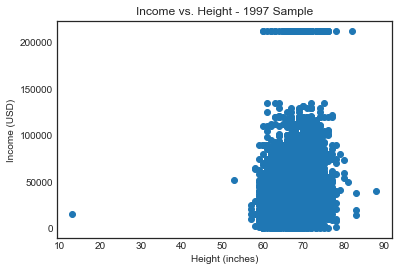

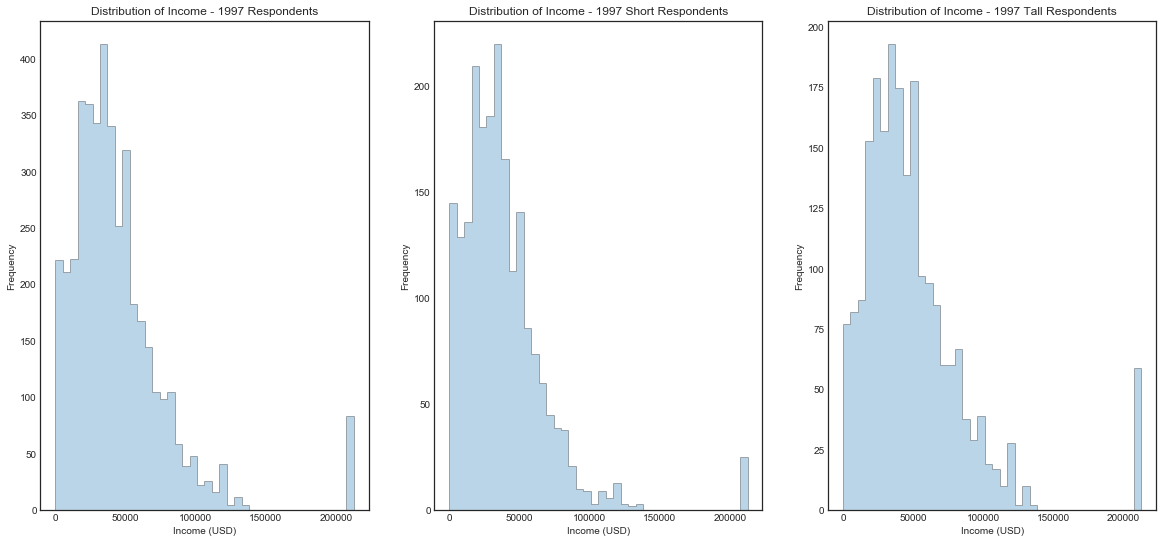

In [227]:
#Then based on this, you want to see how the income distribution is according to a person being tall / short. 
plt.scatter(df97['height'], df97['income']);
plt.title('Income vs. Height - 1997 Sample')
plt.xlabel('Height (inches)')
plt.ylabel('Income (USD)')

print('The mean income for the 1997 sample is', '${:,.0f}'.format(df97['income'].mean()))
print('The mean income for women in the 1997 sample is', '${:,.0f}'.format(df97_f['income'].mean()))
print('The mean income for men in the 1997 sample is', '${:,.0f}'.format(df97_m['income'].mean()))
print('The mean income for short people in the 1997 sample is', '${:,.0f}'.format(df97_short['income'].mean()))
print('The mean income for tall people in the 1997 sample is', '${:,.0f}'.format(df97_tall['income'].mean()))

plt.figure(figsize=(20, 9));

plt.style.use('seaborn-white')

plt.subplot(1,3,1)
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.hist(df97['income'], **kwargs)
plt.title('Distribution of Income - 1997 Respondents')

plt.subplot(1,3,2)
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.hist(df97_short['income'], **kwargs)
plt.title('Distribution of Income - 1997 Short Respondents')

plt.subplot(1,3,3)
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.hist(df97_tall['income'], **kwargs)
plt.title('Distribution of Income - 1997 Tall Respondents')

In [228]:
#With the pattern that you find, and that which points to a difference, you would like to test a set of hypotheses.
#One (the null) is that the income distribution is random while the alternative is that indeed, heights and income have a relationship.
from scipy import stats
t, p = stats.ttest_ind(df97_short['income'], df97_tall['income'])
print("t-test results: t:", t, "\n                p:", '{:,.3f}'.format(p))
print('\nThere is a significant difference in the distributions of income of short and tall people. Reject the null hypothesis.')

t-test results: t: -10.623369307642529 
                p: 0.000

There is a significant difference in the distributions of income of short and tall people. Reject the null hypothesis.


### Part 3: The Math of Gender, Sex & Earnings

In [234]:
#1. Please list the quartiles of the earnings for both NLYS79 and NLYS97 data sets
print('The quartiles of income for NLS79 are as follows:\n',df79['income'].quantile([0.25,0.5,0.75]))
print('\nThe quartiles of income for NLS97 are as follows:\n',df97['income'].quantile([0.25,0.5,0.75]))

The quartiles of income for NLS79 are as follows:
 0.25        0.0
0.50    30000.0
0.75    60000.0
Name: income, dtype: float64

The quartiles of income for NLS97 are as follows:
 0.25    22000.0
0.50    37000.0
0.75    56000.0
Name: income, dtype: float64


The r value for all 1979 respondents is 0.22043890560410456
The r value for female 1979 respondents is 0.06869870531692157
The r value for male 1979 respondents is 0.11680522091921022

The r value for all 1997 respondents is 0.1787762110736601
The r value for female 1997 respondents is 0.03295700822550917
The r value for male 1997 respondents is 0.08981958990843285


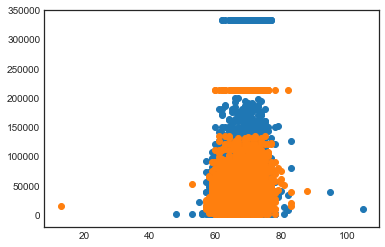

In [246]:
#2. What is the correlation between height and earnings for each of the data sets? What is it when adjusted for gender
#   What is the r value?

#1979 data - all respondents
plt.scatter(df79['height'], df79['income']);
print('The r value for all 1979 respondents is', np.corrcoef(df79['height'], df79['income'])[0,1])

#1979 data - women
print('The r value for female 1979 respondents is', np.corrcoef(df79_f['height'], df79_f['income'])[0,1])

#1979 data - men
print('The r value for male 1979 respondents is', np.corrcoef(df79_m['height'], df79_m['income'])[0,1])


#1997 data - all respondents
plt.scatter(df97['height'], df97['income']);
print('\nThe r value for all 1997 respondents is', np.corrcoef(df97['height'], df97['income'])[0,1])

#1997 data - women
print('The r value for female 1997 respondents is', np.corrcoef(df97_f['height'], df97_f['income'])[0,1])

#1997 data - men
print('The r value for male 1997 respondents is', np.corrcoef(df97_m['height'], df97_m['income'])[0,1])


In [257]:
#3. Please run a regression analysis on the data sets and comment on the effects of height and earnings.
from scipy.stats import linregress

#1979 data
slope, intercept, r_value, p_value, std_err = linregress(df79['height'], df79['income'])
print('For 1979, holding all else constant, an increase of 1 inch in height is associated with an increase of', '${:,.0f}'.format(slope), 'in income.')

#1997 data
slope, intercept, r_value, p_value, std_err = linregress(df97['height'], df97['income'])
print('For 1997, holding all else constant, an increase of 1 inch in height is associated with an increase of', '${:,.0f}'.format(slope), 'in income.')


For 1979, holding all else constant, an increase of 1 inch in height is associated with an increase of $3,108 in income.
For 1997, holding all else constant, an increase of 1 inch in height is associated with an increase of $1,492 in income.
